### SQLite 개요
- 별도 서버나 프로세스, 특별한 설정을 할 필요도 없는, 트랜잭션이 가능한 SQL 데이타베이스 엔진
- 오픈소스, 어떤 용도로든 무료
- 대부분의 브라우저, 거의 모든 스마트폰, 수 많은 프로그램에 사용
- SQLite 특징
- SQL 데이타베이스 엔진 내장
- 별도의 서버 프로세스가 없이, 직접 읽기/쓰기
- 한 개의 파일에 여러 테이블, 색인, 트리거, 뷰 관리
- 크로스 플랫폼, 작은 라이브러리: 200~350 KB, 매우 작은 메모리 (스택 4KB, Heap 100KB)1

In [7]:
import sqlite3

In [3]:
print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.13.0


In [4]:
#  파일이 존재하면 삭제 (사용 주의 )
import os

fname = 'test_news.db3'
if os.path.isfile(fname):
    os.unlink(fname)
    
#  파일이 존재하지 않으면 생성 된다.
db = sqlite3.connect(fname)  

#### 일반적인 사용 수순
- import sqlite3 - sqlite3 모듈 임포트
- connect() - 연결객체 생성
- cursor() - 커서객체 생성
- execute() - SQL문 실행
- fetch() - 실행결과 가져오기

In [9]:
import sqlite3

con = None

try : 
    # connect () - 데이터베이스 파일에 연결하고, 연결 객체를 반환
    con = sqlite3.connect('test_news.db3')
    # cursor() - 커서객체 생성
    cur = con.cursor()
    # execute() - SQL문 실행
    cur.execute('SELECT SQLITE_VERSION()')
    # fetch() - 실행결과 가져오기
    # 커서는 결과집합을 순회하여 데이터를 읽어온다.
    val = cur.fetchone()
    print('SQLITE version : %s' %val)

except sqlite3.Error as e :
    #실패하면, 예외처리 구문을 실행
    print('Error %s' %e.args[0])

finally : 
    if con : con.close()

SQLITE version : 3.13.0


In [8]:
import sqlite3

con = sqlite3.connect('test_news.db3')
with con : 
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    
    val = cur.fetchone()
    print('SQLITE version : %s' %val)

SQLITE version : 3.13.0


#### 테이블 만들기
- create table
- timestamp
- 9 char(n), varchar(n), integer, float, text

In [10]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute('create table news (id varchar(20), time timestamp, title text , agency varchar(20))')

테이블 삭제

In [11]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute('drop table news')
    #더 좋은 표현은 아래의 것
    cur.execute('drop table if exists news')

테이블이 존재하지 않으면 생성

In [13]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute('create table if not exists news (id varchar(20), time timestamp, title text, agency varchar(20))')

데이터 삽입

In [14]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute("insert into news VALUES('0003024670', '2013-08-29 11:39', '국민은행 가족친화 기업에 금리 인하', '매일경제')")
    cur.execute("insert into news VALUES('0003024522', '2013-08-29 09:03', '美양적완화 축소는 은행업종에 긍정적', '매일경제')")
    cur.execute("insert into news VALUES('0002464356', '2013-08-29 08:00', '<진화하는 MTS> KB투자증권, KB스마톡S', '헤럴드생생뉴스')")
    cur.execute("insert into news VALUES('0003106995', '2013-08-29 07:03', 'LG상사, STX에너지 인수전에 KB금융 컨소시엄', '머니투데이')")

한번에 여러 데이터 삽입

In [15]:
con = sqlite3.connect('test_news.db3')

articles = (
    ('0003024670', '2013-08-29 11:39', u'국민은행 가족친화 기업에 금리 인하', u'매일경제'),
    ('0003024522', '2013-08-29 09:03', u'美양적완화 축소는 은행업종에 긍정적', u'매일경제'),
    ('0002464356', '2013-08-29 08:00', u'<진화하는 MTS> KB투자증권, KB스마톡S', u'헤럴드생생뉴스'),
    ('0003106995', '2013-08-29 07:03', u'LG상사, STX에너지 인수전에 KB금융 컨소시엄', u'머니투데이'),
)

with con:
    cur = con.cursor()
    cur.executemany("insert into news values (?, ?, ?, ?)", articles)

In [16]:
sql_script = '''
    drop table if exists news;
    create table news (id varchar(20), time datetime, title text, agency varchar(20));
    insert into news VALUES('0003024670', '2013-08-29 11:39', '국민은행 가족친화 기업에 금리 인하', '매일경제');
    insert into news VALUES('0003024522', '2013-08-29 09:03', '美양적완화 축소는 은행업종에 긍정적', '매일경제');
    insert into news VALUES('0002464356', '2013-08-29 08:00', '<진화하는 MTS> KB투자증권, KB스마톡S', '헤럴드생생뉴스');
    insert into news VALUES('0003106995', '2013-08-29 07:03', 'LG상사, STX에너지 인수전에 KB금융 컨소시엄', '머니투데이');
'''
try:
    con = sqlite3.connect('test_news.db3')
    cur = con.cursor()
    cur.executescript(sql_script)
    con.commit()
except sqlite3.Error as e:
    if con:
        con.rollback()
    print ("error %s" % e.args[0])

finally:
    if con:
        con.close()

데이터 읽기

In [17]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute('select * from news')
    
    rows = cur.fetchall()
    for row in rows : 
        print('%s | %s(%s) '% (row[2] , row[1] , row[3]))

국민은행 가족친화 기업에 금리 인하 | 2013-08-29 11:39(매일경제) 
美양적완화 축소는 은행업종에 긍정적 | 2013-08-29 09:03(매일경제) 
<진화하는 MTS> KB투자증권, KB스마톡S | 2013-08-29 08:00(헤럴드생생뉴스) 
LG상사, STX에너지 인수전에 KB금융 컨소시엄 | 2013-08-29 07:03(머니투데이) 


조건에 해당하는 row를 하나씩 처리

In [20]:
con = sqlite3.connect('test_news.db3')

with con : 
    cur = con.cursor()
    cur.execute("select * from news where agency = '매일경제'")
    
    while True : 
        row = cur.fetchone()
        if row == None :
            break
        print("%s | %s | %s" % (row[2], row[1], row[3]))

국민은행 가족친화 기업에 금리 인하 | 2013-08-29 11:39 | 매일경제
美양적완화 축소는 은행업종에 긍정적 | 2013-08-29 09:03 | 매일경제


In [23]:
import pandas as pd


In [25]:
query = 'SELECT * FROM sqlite_master WHERE type = "table"'

con = sqlite3.connect('test_news.db3')
with con : 
    df = pd.read_sql_query(query , con)
df

,type,name,tbl_name,rootpage,sql
0,table,news,news,2,"CREATE TABLE news (id varchar(20), time dateti..."


In [28]:
con = sqlite3.connect('test_news.db3')
df = pd.read_sql_query('SELECT * FROM news',con)
df

,id,time,title,agency
0,0003024670,2013-08-29 11:39,국민은행 가족친화 기업에 금리 인하,매일경제
1,0003024522,2013-08-29 09:03,美양적완화 축소는 은행업종에 긍정적,매일경제
2,0002464356,2013-08-29 08:00,"<진화하는 MTS> KB투자증권, KB스마톡S",헤럴드생생뉴스
3,0003106995,2013-08-29 07:03,"LG상사, STX에너지 인수전에 KB금융 컨소시엄",머니투데이


In [30]:
con = sqlite3.connect('test_news.db3')
df = pd.read_sql_query('SELECT * FROM news',con,index_col='id')
df['time'] = pd.to_datetime(df['time'])
df

,time,title,agency
id,,,
0003024670,2013-08-29 11:39:00,국민은행 가족친화 기업에 금리 인하,매일경제
0003024522,2013-08-29 09:03:00,美양적완화 축소는 은행업종에 긍정적,매일경제
0002464356,2013-08-29 08:00:00,"<진화하는 MTS> KB투자증권, KB스마톡S",헤럴드생생뉴스
0003106995,2013-08-29 07:03:00,"LG상사, STX에너지 인수전에 KB금융 컨소시엄",머니투데이


조건부 읽기

In [34]:
con = sqlite3.connect('test_news.db3')
query = '''
    SELECT time, title 
    FROM news 
    WHERE agency = "매일경제"
'''
df = pd.read_sql_query(query , con)
df

,time,title
0,2013-08-29 11:39,국민은행 가족친화 기업에 금리 인하
1,2013-08-29 09:03,美양적완화 축소는 은행업종에 긍정적


테이블에 쓰기

In [35]:
con = sqlite3.connect('test_news.db3')
df.to_sql('maekyung' , con , if_exists='replace')

In [36]:
query = 'SELECT * FROM sqlite_master WHERE type = "table"'

con = sqlite3.connect('test_news.db3')
with con : 
    df = pd.read_sql_query(query , con)
df

,type,name,tbl_name,rootpage,sql
0,table,news,news,2,"CREATE TABLE news (id varchar(20), time dateti..."
1,table,maekyung,maekyung,3,"CREATE TABLE ""maekyung"" (\n""index"" INTEGER,\n ..."


In [39]:
query = '''
SELECT *
FROM maekyung 
'''
con = sqlite3.connect('test_news.db3')
with con : 
    df = pd.read_sql_query(query,con)
df

,index,time,title
0,0,2013-08-29 11:39,국민은행 가족친화 기업에 금리 인하
1,1,2013-08-29 09:03,美양적완화 축소는 은행업종에 긍정적


In [40]:
query = '''
SELECT *
FROM news 
'''
con = sqlite3.connect('test_news.db3')
with con : 
    df = pd.read_sql_query(query,con)
df

,id,time,title,agency
0,0003024670,2013-08-29 11:39,국민은행 가족친화 기업에 금리 인하,매일경제
1,0003024522,2013-08-29 09:03,美양적완화 축소는 은행업종에 긍정적,매일경제
2,0002464356,2013-08-29 08:00,"<진화하는 MTS> KB투자증권, KB스마톡S",헤럴드생생뉴스
3,0003106995,2013-08-29 07:03,"LG상사, STX에너지 인수전에 KB금융 컨소시엄",머니투데이


환율 데이터 테이블

In [46]:
import datetime
from pandas_datareader import data
%matplotlib inline

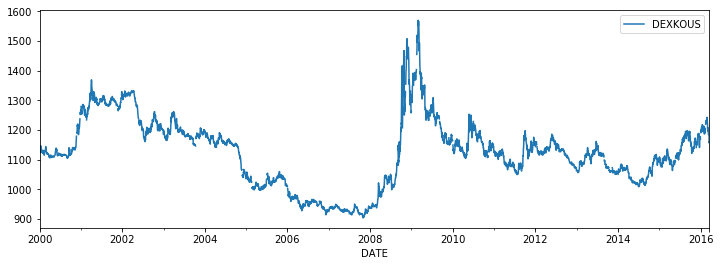

In [47]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2016,3,20)

dexkous = data.get_data_fred('DEXKOUS', start=start, end=end)
dexkous.plot(figsize=(12,4))

In [49]:
dexkous.tail()

,DEXKOUS
DATE,
2016-03-14,1187.39
2016-03-15,1194.99
2016-03-16,1190.59
2016-03-17,1155.83
2016-03-18,1160.11


In [50]:
con = sqlite3.connect('dex.db3')
dexkous.to_sql('dexkous',con,if_exists='replace')

query = 'SELECT * FROM dexkous'
df = pd.read_sql_query(query,con)
df.tail()

,DATE,DEXKOUS
4225,2016-03-14 00:00:00,1187.39
4226,2016-03-15 00:00:00,1194.99
4227,2016-03-16 00:00:00,1190.59
4228,2016-03-17 00:00:00,1155.83
4229,2016-03-18 00:00:00,1160.11
